# Week3 分類問題（Classification problem）
## 目的：新しいデータに対して、それがどの分類に入るかを予測したい。
$x$ : 与えられたデータ

$y$ : $x$からの予測
### 例：10秒後にドル円相場は上がるか？下がるか？　を過去3分間1秒ごとのMidから予測したい

学習に必要なデータ

- $x_0^{(0)}, \cdots, x_{180}^{(0)}$ : 2017.04.01T00:00:00～2017.04.01T00:03:00の1秒ごとのドル円レート
- $x_0^{(1)}, \cdots, x_{180}^{(1)}$ : 2017.04.01T00:00:01～2017.04.01T00:03:01の1秒ごとのドル円レート
- $\cdots$
- $x_0^{(k)}, \cdots, x_{180}^{(k)}$ : 2017.05.10T12:34:56～2017.05.10T12:37:56の1秒ごとのドル円レート
- $\cdots$
- $x_0^{(m)}, \cdots, x_{180}^{(m)}$ : 2017.05.26T23:57:00～2017.05.26T24:00:00の1秒ごとのドル円レート


- $y^{(0)}$ : 2017.04.01T00:03:00から10秒後にマーケットが上がったら1、下がったら0
- $\cdots$
- $y^{(m)}$ : 2017.05.27T00:00:00から10秒後にマーケットが上がったら1、下がったら0

今から予測したいこと
- $x_0, x_1, \cdots, x_{180}$ : 3分前～現在の1秒おきのドル円レート
- $y=0 今から10秒後に下がるなら0、上がるなら1$


## 目標：新しいデータ$x$が与えられたときに、$y=1$である「確率」を知りたい

- パラメータ$\theta$、新しいデータ$x$が与えられたときに、$y=1$である確率を表す式$h_\theta (x)$を次のように立てる。
- $h_\theta (x) = g(\theta^T x)$
- $g(z) = \frac{1}{1 + e^{-x}}$

$\theta^T X$は前回やったのと同じだが、$\theta^T X$のままだと$-\infty$から$+\infty$までの値をとりうるため、0~1の間に値をとるために$g(z) = \frac{1}{1 + e^{-x}}$をかませる。



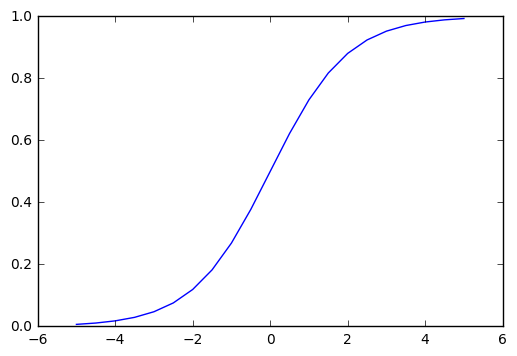

In [21]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

x1 = 0.5 * np.sort(np.r_[np.arange(11), - np.arange(11)])
y1 = 1 / (1 + np.exp(-x1))
plt.plot(x1, y1)


上のグラフからわかるように、
- $g(z)$は0を中心として対称。
- $z>0$のとき$g(z)>\frac{1}{2}$。$z<0$のとき$g(z)<\frac{1}{2}$。$z=0$のとき$g(z)=0.5$

### これからやること

- ①学習データ$\{x_i^{(j)}\}_{(i, j)}$からパラメータ$\theta$を推計する。
- ②新しいデータ$x=(x_0, \cdots, x_n)$が与えられたときに、学習済みパラメータ$\theta$を用いて
$y = h_\theta (x) = g(\theta^T x) = \frac{1}{1 + e^{- \theta^T x}}$を計算する。
- ③$y > 0$か$y < 0$かどうかを判断する。

一番難しい（かつ、意味のある）のが①なので、このやり方を深掘り。

### 前回（LinearRegression）はどうやったか
- コスト関数$J(\theta) = \frac{1}{m} \sum_{i = 1}^m Cost(x^{(i)}, y^{(i)})$を用意する。
- Gradient descentでコスト関数$J(\theta)$を最小にするパラメータ$\theta$を求める。

### 今回はどうするか
基本戦略は同じ。ただし、コスト関数は次のように定義する。

- $J(\theta) = \frac{1}{m} \sum_{i = 1}^m Cost(h_\theta (x^{(i)}), y^{(i)})$

- $Cost(h_\theta (x)), y) = - log (h_\theta (x))$ if $y = 1$

- $Cost(h_\theta (x)), y) = - log (1 - h_\theta (x))$ if $y = 0$

さらに、上のように書くと面倒なので、一つの式にまとめると次のようになる。

- $J(\theta) = - \frac{1}{m} \sum_{i = 1}^m \{ y^{(i)} log (h_\theta (x^{(i)})) + (1 - y^{(i)}) log (1 - h_\theta (x^{(i)})) \}$

Gradient Descentも同じ。今回はコスト関数の微分は次式。

$\frac{\partial J(\theta)}{\partial \theta _j} = \frac{1}{m} \sum_{i = 1}^m (h_\theta (x^{(i)}) - y^{(i)}) x_j^{(i)}$

あとは同じように逐次推計値$\theta_j$を更新していけばよい。

$\theta_j := \theta_j - \frac{\alpha}{m} \sum_{i=1}^{m} ((h_\theta (x^{(i)}) - y^{(i)}) x_j^{(i)}$





## 多値分類問題
$y=0$ or $1$ だけでなく、一般的にはもっと多くの分類をしたい。
- 10秒後のドル円相場は　上がる（$y=1$）、下がる（$y=-1$）、変わらない（$y=0$）
- 10秒後のドル円相場は　10銭以上上がる、5銭～10銭上がる、5銭以内で上がる、5銭以内で下がる、5～10銭下がる、10銭以上下がる

### One-vs-All
$h_\theta (x) = g(\theta^T x)$は$y=1$である確率を表すのだった。

これを拡張して、$h_\theta^{(0)} (x)$は$y=0$である確率を、$h_\theta^{(1)} (x)$は$y=1$である確率を、$h_\theta^{(2)} (x)$は$y=2$である確率を、それぞれ表すようにする。


In [31]:
# data load OLD Version
import csv
f = open('week3_y.csv', 'r')
dataReader = csv.reader(f)
y = np.zeros(5000)
i = 0
for row in dataReader:
    for c in row:
        y[i] = float(c) # float(c) : 文字列cを実数値型に変換する
    i = i + 1

f = open('week3_X.csv', 'r')
dataReader = csv.reader(f)
X = np.zeros(5000 * 400).reshape(5000, 400)
i = 0
for row in dataReader:
    j = 0
    for c in row:
        X[i, j] = float(c)
        j = j + 1
    i = i + 1

print('load done.')
print(X.shape)
print(y.shape)

load done.
(5000, 400)
(5000,)


In [33]:
# data load new version
import pandas as pd
X = pd.read_csv("week3_X.csv", header=None).values
y = pd.read_csv("week3_y.csv", header=None).values
print("load done.")
print(X.shape)
print(y.shape)

load done.
(5000, 400)
(5000, 1)


--- コスト関数$J(\theta)$を定義

以後、標本数を$m$、説明変数の数を$n$で表す。

\begin{eqnarray}
J(\theta) &=& \frac{1}{m} \sum_{i=1}^m \{ - y^{(i)} \log (h_\theta (x^{(i)})) - (1 - y^{(i)}) \log (1 - h_\theta (x^{(i)}) ) \} \\
&=& \frac{1}{m} \sum_{i=1}^m \{ - y^{(i)} \log (g(\theta^T x^{(i)})) - (1 - y^{(i)}) \log (1 - g(\theta^T x^{(i)})) \} \\
&=& \frac{1}{m} \sum_{i=1}^m \{ - y^{(i)} \log (g(x^{(i) T} \theta)) - (1 - y^{(i)}) \log (1 - g( x^{(i) T} \theta)) \}
\end{eqnarray}

\begin{eqnarray}
    grad J = 
    \begin{bmatrix}
        \frac{\partial J}{\partial \theta_0} \\
        \frac{\partial J}{\partial \theta_1} \\
        \cdots \\
        \frac{\partial J}{\partial \theta_n} \\
    \end{bmatrix}
    &=& \frac{1}{m}
    \begin{bmatrix}
        \sum_{i=1}^m ((h_\theta (x^{(i)}) - y^{(i)}) x_0^{(i)}) \\
        \sum_{i=1}^m ((h_\theta (x^{(i)}) - y^{(i)}) x_1^{(i)}) \\
        \cdots \\
        \sum_{i=1}^m ((h_\theta (x^{(i)}) - y^{(i)}) x_n^{(i)})
    \end{bmatrix} \\
    &=& \frac{1}{m} \sum_{i = 1}^m ((h_\theta (x^{(i)}) - y^{(i)}) x^{(i)}) \\
    &=& \frac{1}{m} X^T
        \begin{bmatrix}
            h_\theta (x^{(1)}) - y^{(1)} \\
            h_\theta (x^{(2)}) - y^{(2)} \\
            \cdots \\
            h_\theta (x^{(m)}) - y^{(m)} \\
        \end{bmatrix}
\end{eqnarray}

In [26]:
def sigmoid(z):
    """Sigmoid function"""
    return 1.0 / (1.0 + np.exp(- z))

# Test
print(sigmoid(0.0))
print(sigmoid(np.array([-1.0, 0.0, 1.0])))

0.5
[ 0.26894142  0.5         0.73105858]


In [27]:
# Test
a = np.array([0.0, 1.0, 2.0])
print(a.shape)
print(1 + a) # 配列の全ての要素に1を足す
print(2 * a) # 配列の全ての要素に2を掛ける
print(- a) # 配列の全ての要素の符号を反転
print(np.exp(a)) # 配列の全ての要素のexpをとる
print(a[1:]) # 配列の1番目以降からの要素を抜き取る（スライシング）
print("----")
b = np.arange(6).reshape(2, 3) # 2x3行列
print(b.shape)
print(b)
print(b.dot(a)) # 行列演算として（2x3行列）と（3x1行列）を掛ける。自動的に配列を3x1行列とみなすらしい
print("----")
print((a == 1) + 0)

(3,)
[ 1.  2.  3.]
[ 0.  2.  4.]
[-0. -1. -2.]
[ 1.          2.71828183  7.3890561 ]
[ 1.  2.]
----
(2, 3)
[[0 1 2]
 [3 4 5]]
[  5.  14.]
----
[0 1 0]


In [34]:
def lrCostFunction(theta, X, y, _lambda):
    # コスト関数の本体
    h_theta_X = sigmoid(X.dot(theta)) # (\theta^T x^{(i)})_i
    J = np.sum(- y * np.log(h_theta_X) - (1 - y) * np.log(1.0 - h_theta_X))
    m = X.shape[0]
    J /= m
    # Regularized term
    J += 0.5 * (_lambda / m) * np.sum(np.square(theta[1:])) # 0番目要素は入れない
    return J

def lrCostFunctionGrad(theta, X, y, _lambda):
    h_theta_X = sigmoid(X.dot(theta))
    m = X.shape[0]
    grad = (X.T).dot(h_theta_X - y) / m
    print(grad.shape)
    print(theta.shape)
    grad[1:] += (_lambda / m) * theta[1:] # Regularized term
    return grad

# Test
theta = np.zeros(X.shape[1])
J = lrCostFunction(theta, X, y, 0.0)
grad = lrCostFunctionGrad(theta, X, y, 0.0)
print(grad.shape)

(400, 5000)
(400,)


ValueError: operands could not be broadcast together with shapes (399,5000) (399,) (399,5000) 

In [10]:
import scipy.optimize as spo
import pandas as pd
def lrCostFunction_Wrapper(param, *args):
    """lrCostFunctionをfmin_cgに通すためのラッパー関数"""
    theta = param
    X, y, _lambda = args
    return lrCostFunction(theta, X, y, _lambda)

def lrCostFunctionGrad_Wrapper(param, *args):
    """lrCostFunctionGradをfmin_cgに通すためのラッパー関数"""
    theta = param
    X, y, _lambda = args
    return lrCostFunctionGrad(theta, X, y, _lambda)

def oneVsAll(X, y, num_labels, _lambda):
    m = X.shape[0]
    n = X.shape[1]
    allTheta = np.zeros((num_labels, n + 1)) # 求めるべき\theta 0~9までの10個分、各400+1個。（+1個はBias項）
    X = np.concatenate((np.ones((m, 1)), X), axis = 1) # XにBias項相当のデータ(-1)を追加
    for i in range(0, num_labels):
        initialTheta = np.ones((n + 1, 1)) # 当初は初期値0でやっていたものの、収束がよくないので初期値1に変更。
        y_zero_or_one = (y == i) + 0
        # np.savetxt("y_" + str(i) + ".csv", y_zero_or_one, delimiter="\n")
        args = X, y_zero_or_one, _lambda
        resultTheta = spo.fmin_cg(lrCostFunction_Wrapper, initialTheta, fprime=lrCostFunctionGrad_Wrapper, args=args)
        allTheta[i, :] = resultTheta
    return allTheta

In [13]:
# training
_lambda = 0.1
allTheta = oneVsAll(X, y, 10, _lambda)
print('Optimization was done.')

Optimization terminated successfully.
         Current function value: 0.008570
         Iterations: 133
         Function evaluations: 535
         Gradient evaluations: 535
Optimization terminated successfully.
         Current function value: 0.013138
         Iterations: 140
         Function evaluations: 535
         Gradient evaluations: 535
Optimization terminated successfully.
         Current function value: 0.050833
         Iterations: 230
         Function evaluations: 729
         Gradient evaluations: 729
Optimization terminated successfully.
         Current function value: 0.057612
         Iterations: 261
         Function evaluations: 806
         Gradient evaluations: 806
Optimization terminated successfully.
         Current function value: 0.033093
         Iterations: 207
         Function evaluations: 688
         Gradient evaluations: 688
Optimization terminated successfully.
         Current function value: 0.054519
         Iterations: 236
         Function ev

In [14]:
# prediction
def predictOneVsAll(allTheta, X):
    m = X.shape[0]
    X = np.concatenate((np.ones((m, 1)), X), axis = 1)
    prob = sigmoid(X.dot(allTheta.T))
    res = prob.argmax(axis = 1)
    return res

predicted = predictOneVsAll(allTheta, X)
np.savetxt("predicted.csv", predicted, delimiter="\n")
print(((predicted == y) + 0).mean())

0.9646
